In [232]:
import numpy as np
import matplotlib.pyplot as plt

In [419]:
c = 299792458
e = 1.602 *10**(-19)
h = 6.626 *10**(-34)
hbar = h/(2*np.pi)

cminv1_to_J = h*c/(10**(-2))

#Använder Hartree enheter
u = 1822.888 
Å = 1.8897259886 
cminv = 4.55633e-6 


In [421]:
I2_X = {'Te': 0 *cminv,
        'we': 214.50 * cminv,
        'wexe': 0.614 * cminv,
        're': 2.666 * Å,
        }
I2_B = {'Te': 15769.01 * cminv,
        'we': 125.69 * cminv,
        'wexe': 0.764 * cminv,
        're': 3.024 * Å,
        }

mu = 63.56 * u #Reducerad massa

In [422]:
def potential(Te, we, wexe, re, r): #morsepotential
    De = we**2/(4*wexe)
    a = we * np.sqrt(mu/(2*De))
    return Te + De*(1-np.exp(-a*(r-re)))**2

def X_potential(r):
    return potential(I2_X['Te'], I2_X['we'], I2_X['wexe'], I2_X['re'], r)

def B_potential(r):
    return potential(I2_B['Te'], I2_B['we'], I2_B['wexe'], I2_B['re'], r)


In [423]:
def hamiltionian(r, potential_func):
    N = len(r)
    interval = r[-1]-r[0]
    dr = interval/N

    H = np.zeros((N,N))
    i,j = np.indices(H.shape)
    H[i==j] = 1/(mu*dr**2)
    H[abs(i-j)==1] = -1/(2*mu*dr**2)

    H[i==j] += potential_func(r)

    return H

def X_hamiltonian(r):
    return hamiltionian(r, X_potential)

def B_hamiltionian(r):
    return hamiltionian(r, B_potential)

In [424]:
N = 1000
interval = np.array([2, 5])*Å
r = np.linspace(interval[0], interval[1], N)
dr = (interval[1]-interval[0])/N

X_H = X_hamiltonian(r)
B_H = B_hamiltionian(r)

E_X, psi_X = np.linalg.eigh(X_H)
E_B, psi_B = np.linalg.eigh(B_H)


In [433]:
lambdas = []
intensity = []
vprime = 9

for vbis in range(0, 17):
    E_diff = (E_B[vprime] - E_X[vbis]) / cminv
    lam = h*c/(E_diff*cminv1_to_J)
    lambdas.append(lam)

    FC = np.sum(np.multiply(psi_X[:, vbis], psi_B[:, vprime]))*dr
    frequency = c/lam
    intensity.append(FC*FC*frequency**3)

lambdas = np.array(lambdas)*10**9

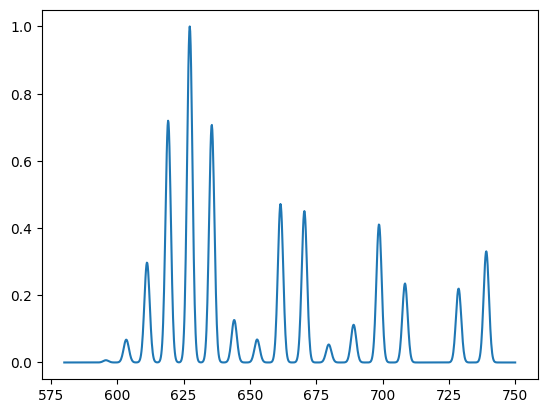

[595.70792581 603.37788037 611.19844803 619.17374101 627.30801709
 635.60568597 644.07131597 652.70964115 661.52556869 670.52418682
 679.71077304 689.09080286 698.66995906 708.45414137 718.44947678
 728.6623304  739.09931696]
[1.1003334331455373e+36, 1.1147855849659058e+37, 4.8833568212910725e+37, 1.1814914045156904e+38, 1.6411361757311697e+38, 1.1610790081567474e+38, 2.0768714081272795e+37, 1.1235418114404692e+37, 7.742012906963276e+37, 7.394997599300845e+37, 8.779613078382261e+36, 1.842794853292226e+37, 6.750525886306347e+37, 3.859427488634216e+37, 6.201506313484599e+33, 3.6141434545761636e+37, 5.428087643542672e+37]


In [438]:

N = 1000         
lam_intervall = (580, 750)   
lam = np.linspace(lam_intervall[0], lam_intervall[1], N)   
FC_faktorer = np.zeros_like(lam)                               


def gaussian(x, mean, std, height):
    normalization = 1/ (np.sqrt(2 * np.pi) * std)
    norm_dist = normalization * np.exp(-0.5*((lam-mean)/std)**2)
    return height * norm_dist

# Iterate over peaks and add them to the spectrum
for i in range(0, len(lambdas)):
    peak_mid = lambdas[i]
    peak_height = intensity[i]
    peak_width = 1

    peak = gaussian(lambdas[i], peak_mid, peak_width, peak_height)
    FC_faktorer += peak

# Normalize intensity to highest peak
FC_faktorer /= np.max(FC_faktorer)

plt.plot(lam, FC_faktorer)
plt.show()
